Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob

%matplotlib inline

In [2]:
def leer_precios(filename):
    for k in range(10):
        df = pd.read_excel(filename,
                           skiprows = k,
                           usecols = list(range(25)))
        if df.iloc[0,0] == 'Fecha':
            df = pd.read_excel(filename,
                               skiprows = k+1,
                               usecols = list(range(25)))
            break        
    return(df)

In [3]:
filenames = !ls precios/*.xls*
filenames

['precios/Precio_Bolsa_Nacional_($kwh)_1995.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1996.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1997.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1998.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1999.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2000.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2001.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2002.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2003.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2004.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2005.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2006.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2007.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2008.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2009.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2010.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2011.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2012.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2013.xlsx',
 'precios/Precio_Bolsa_Nacional

In [4]:
dfs = []
for filename in filenames:
    dfs.append(leer_precios(filename))
dfs= pd.concat(dfs, sort=True)
dfs.size

210225

In [5]:
dfs.shape

(8409, 25)

In [6]:
pvt = pd.melt(dfs,id_vars='Fecha',value_name ='Precio', var_name ='Hora')

**2.--** Compute e imprima el número de registros con datos faltantes.

In [16]:
dos = pvt.isnull().sum(axis = 1)

In [17]:
dos[dos > 0].count() 

238

**3.--** Compute e imprima el número de registros duplicados.

In [19]:
tres = pvt.copy()
tres = tres.drop_duplicates()
dup =  len(pvt.index) - len(tres.index)
dup

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [20]:
cuatro = pvt.copy()
cuatro = (cuatro.drop_duplicates())
cuatro = cuatro.dropna()
len(cuatro.index)

199819

**5.--** Compute y grafique el precio primedio diario.

In [26]:
cinco = cuatro.copy()

In [27]:
cinco['dia'] = pd.DatetimeIndex(cinco['Fecha']).day
cinco['mes'] = pd.DatetimeIndex(cinco['Fecha']).month

In [28]:
aux = cinco.groupby('dia')['Precio'].mean()

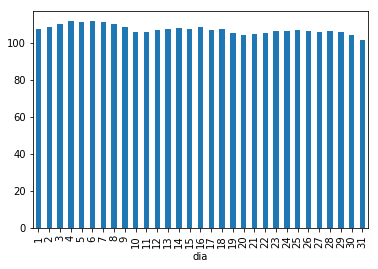

In [29]:
aux.plot(kind="bar")

**6.--** Compute y grafique el precio máximo por mes.

In [30]:
aux = cinco.groupby('mes')['Precio'].max()

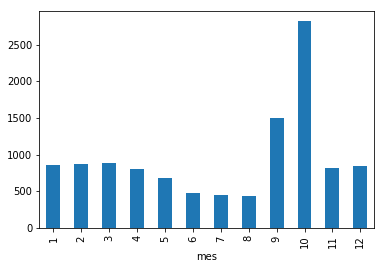

In [31]:
aux.plot(kind="bar")

**7.--** Compute y grafique el precio mínimo mensual.

In [32]:
aux = cinco.groupby('mes')['Precio'].min()

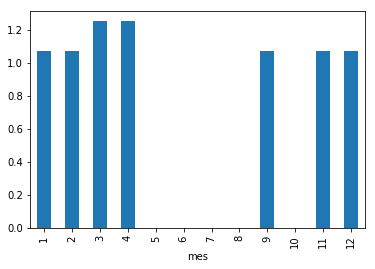

In [33]:
aux.plot(kind="bar")

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [34]:
aux = cinco.groupby('mes')['Precio'].max()

In [35]:
aux2 = cinco.groupby('mes')['Precio'].mean()

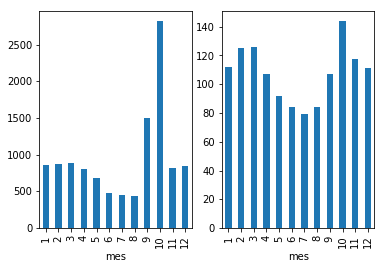

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2)
aux.plot(kind="bar", ax=axes[0])
aux2.plot(kind="bar", ax=axes[1])

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [37]:
cinco['dia_semana'] = [a.weekday() for a in pd.to_datetime(cinco['Fecha'])]

In [38]:
aux = cinco.copy()

In [39]:
aux = aux[aux['dia_semana'] < 5]

In [40]:
aux2 = aux.groupby('Fecha')['Precio'].max()

In [41]:
aux3 = pd.DataFrame({'Fecha':aux2.index, 'PrecioMax':aux2.values})

In [42]:
aux['Fecha'] = pd.to_datetime(aux['Fecha'])

In [43]:
aux5 = pd.merge(aux, aux3, on=['Fecha'], how='inner')

In [44]:
aux6 = aux5[aux5['Precio'] == aux5['PrecioMax']]

In [45]:
aux6.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,PrecioMax
11,1995-07-21,19,16.67,21,7,4,16.67
35,1995-07-24,19,22.50,24,7,0,22.50
59,1995-07-25,19,1.50,25,7,1,1.50
83,1995-07-26,19,8.00,26,7,2,8.00
107,1995-07-27,19,1.50,27,7,3,1.50


In [46]:
a = list(map(int,aux6['Hora'].tolist()))

(array([  41.,   29.,   25.,   20.,   31.,   92.,  134.,  164.,  293.,
         397.,  653., 1039.,  607.,  555.,  774.,  716.,  517.,  422.,
        2776., 5022., 1660.,  619.,  147.,   41.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

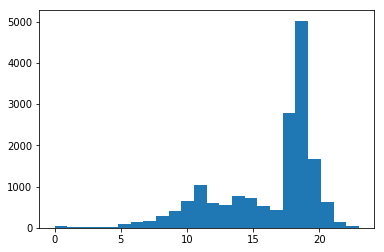

In [47]:
plt.hist(a, bins=24)

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [48]:
DatosPorDia = cinco.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaSabado = DatosPorDia[(DatosPorDia['Dia'] == 'Saturday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaSabado.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaSabado, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

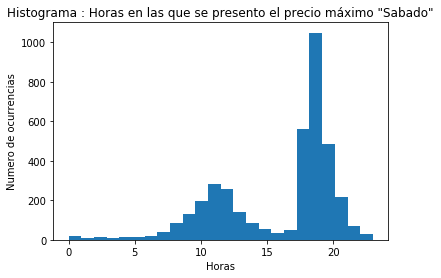

In [49]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Sabado"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [50]:
DatosPorDia = cinco.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaDomingo = DatosPorDia[(DatosPorDia['Dia'] == 'Sunday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaDomingo.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaDomingo, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

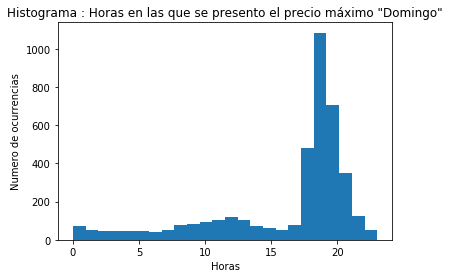

In [51]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Domingo"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [52]:
cinco['anio'] = [a.year for a in pd.to_datetime(cinco['Fecha'])]

In [53]:
cinco.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,anio
1,1995-07-21,0,1.073,21,7,4,1995
2,1995-07-22,0,1.073,22,7,5,1995
3,1995-07-23,0,1.073,23,7,6,1995
4,1995-07-24,0,1.000,24,7,0,1995
5,1995-07-25,0,0.990,25,7,1,1995


In [54]:
aux = cinco.copy()

In [55]:
aux2 = aux.groupby('anio')['Precio'].min()

In [56]:
aux2.head()

anio
1995     0.00000
1996     0.00000
1997    10.88231
1998    13.84733
1999    18.35953
Name: Precio, dtype: float64

In [57]:
aux3 = pd.DataFrame({'anio':aux2.index, 'PrecioMin':aux2.values})

In [58]:
aux3.head()

,anio,PrecioMin
0,1995,0.00000
1,1996,0.00000
2,1997,10.88231
3,1998,13.84733
4,1999,18.35953


In [59]:
aux4 = pd.merge(aux, aux3, on=['anio'], how='inner')

In [60]:
aux4.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,anio,PrecioMin
0,1995-07-21,0,1.073,21,7,4,1995,0.0
1,1995-07-22,0,1.073,22,7,5,1995,0.0
2,1995-07-23,0,1.073,23,7,6,1995,0.0
3,1995-07-24,0,1.000,24,7,0,1995,0.0
4,1995-07-25,0,0.990,25,7,1,1995,0.0


In [61]:
aux5 = aux4[aux4['Precio'] == aux4['PrecioMin']]

In [62]:
aux6 = aux5[['Fecha', 'PrecioMin']].drop_duplicates()

In [63]:
aux6[['Fecha', 'PrecioMin']]

,Fecha,PrecioMin
7,1995-07-28,0.000000
10,1995-07-31,0.000000
11,1995-08-01,0.000000
84,1995-10-13,0.000000
1164,1995-07-30,0.000000
1988,1995-07-29,0.000000
2645,1995-07-26,0.000000
4140,1996-06-30 00:00:00,0.000000
4149,1996-07-09 00:00:00,0.000000
4152,1996-07-12 00:00:00,0.000000


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [64]:
aux = cinco.copy()

In [65]:
aux['mes'] = [a.month for a in pd.to_datetime(cinco['Fecha'])]

In [66]:
aux.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,anio
1,1995-07-21,0,1.073,21,7,4,1995
2,1995-07-22,0,1.073,22,7,5,1995
3,1995-07-23,0,1.073,23,7,6,1995
4,1995-07-24,0,1.000,24,7,0,1995
5,1995-07-25,0,0.990,25,7,1,1995


In [67]:
aux1 = aux.groupby('Fecha')['Precio'].mean()

In [68]:
aux2 = aux.groupby(['mes', 'anio'])['Precio'].mean()

In [69]:
aux2.head()

mes  anio
1    1996     23.008071
     1997     21.623433
     1998    133.844299
     1999     24.921645
     2000     36.778780
Name: Precio, dtype: float64

In [70]:
aux2.index.levels[1]

Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018],
           dtype='int64', name='anio')

In [71]:
aux3 = pd.DataFrame({'anio':aux2.index.to_numpy(), 'Prom':aux2.values})

In [72]:
aux3['anio'] = aux3['anio'][0][1]

In [73]:
aux3.head()

,anio,Prom
0,1996,23.008071
1,1996,21.623433
2,1996,133.844299
3,1996,24.921645
4,1996,36.778780


In [74]:
aux4 = aux3.T.squeeze()

In [76]:
aux4.head()

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
anio,1996.000000,1996.000000,1996.000000,1996.000000,1996.00000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,...,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.00000,1996.00000,1996.000000
Prom,23.008071,21.623433,133.844299,24.921645,36.77878,70.606654,38.709923,69.119002,58.876876,82.782055,...,107.644028,195.049164,66.698532,55.756056,180.339171,164.292436,175.054653,630.19355,107.43928,101.346352


In [87]:
aux1.head()

Fecha
1996-02-01    13.903167
1996-02-02    13.559000
1996-02-03    14.524958
1996-02-04     7.166917
1996-02-05     8.333542
Name: Precio, dtype: float64

---

In [88]:
DatosPorMesPromedio = cinco.copy()
DatosPorMesPromedio['Fecha'] = pd.to_datetime(DatosPorMesPromedio['Fecha'])
DatosPorMesPromedio['Mes'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
DatosPorMesPromedio['year'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
DatosPorMesYear = DatosPorMesPromedio.groupby(['Mes','year']).agg({'Precio': np.mean}) 
DatosPorMesYear.reset_index(inplace=True)
DatosPorMesYear.columns = ['Mes','year','PromedioPorMes']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')

DatosPorDia = cinco.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia = DatosPorDia.groupby('Fecha').agg({'Precio': np.mean}) 
DatosPorDia.reset_index(inplace=True)
DatosPorDia.columns = ['Fecha','PrecioPorDia']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')
DataFramesMerge = pd.merge(DataFramesMerge, DatosPorDia, on = ['Fecha'], how ='inner')
DataFrameHaGraficar = DataFramesMerge.groupby('Fecha').agg({'PrecioPorDia': np.mean,'PromedioPorMes': np.mean}) 


<Figure size 1440x1440 with 0 Axes>

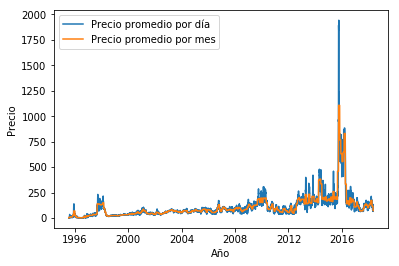

In [90]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PrecioPorDia'], label="Precio promedio por día")
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PromedioPorMes'], label="Precio promedio por mes")
plt.xlabel("Año")
plt.ylabel("Precio")

ax.legend()